# Import

In [ ]:
pip install scikit-learn==1.0.2


In [29]:
pip install imbalanced-learn

In [22]:
!pip install scikit-plot

In [65]:
!pip install shap
!pip install eli5
!pip install lime
!pip install dalex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.0-py3-none-any.whl size=1042471 sha256=d79b89ef7f15be7ff195f5693e78c1f4f306690929701a485c9383afffcc3822
  Stored in directory: /root/.cache/pip/wheels/e2/38/c1/25a95206a4873a287d776fc8e77aa7d93971acc643ecb3db38
Successfully built dalex


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Seperti apa distribusi usia para nasabah? Usia manakah yang cenderung memiliki kemungkinan churn terbesar?

Apakah terdapat korelasi antara tingkat pendidikan dan income category?

Bagaimana korelasi dari kedua prediktor tersebut terhadap churn?

Apakah terdapat perbedaan yang signifikan antara gender dengan kemungkinan nasabah untuk churn?

Apakah semakin lama customer menjadi nasabah maka semakin kecil kemungkinan nasabah tersebut untuk churn?

Apakah semakin sering customer berinteraksi dengan bank dalam 1 tahun terakhir mempengaruhi besar atau kecilnya kemungkinan nasabah untuk churn?


In [89]:
# load customer churn dataset
churn_data = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/bank_churn_dataset/bank_churn_data.csv")


# EDA

In [ ]:
#Terdapat Coloumyg yg tidak terlihat
pd.options.display.max_columns = 50
pd.options.display.max_rows = 50
churn_data.head()

,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

No Churn Column so use classification type model, but attrition flag is one category to detect is customer churn or not, so we will use attition instead


### null and duplicate

In [ ]:
churn_data.isna().sum()

user_id                     0
attrition_flag              0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
dtype: int64

In [ ]:
churn_data.duplicated().sum()

0

## Data understanding

### Uniqe data check

In [ ]:
categorical = churn_data.select_dtypes(include=['object']).columns.tolist()
numerical = churn_data.select_dtypes(include=['int','float']).columns.tolist()

In [ ]:
for i in categorical:
  unique_values = churn_data[i].unique()
  print(f'Values in {i}: ', unique_values)

Values in attrition_flag:  ['Existing Customer' 'Attrited Customer']
Values in gender:  ['M' 'F']
Values in education_level:  ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Values in marital_status:  ['Married' 'Single' 'Unknown' 'Divorced']
Values in income_category:  ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Values in card_category:  ['Blue' 'Gold' 'Silver' 'Platinum']


## Statistical summary

In [ ]:
# numerical statistical sumary
churn_data[numerical].describe()

,user_id,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
 for i in categorical:
  print(f"Value counts of {i} column")
  print(churn_data[i].value_counts(), '\n')

Value counts of attrition_flag column
attrition_flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64 

Value counts of gender column
gender
F    5358
M    4769
Name: count, dtype: int64 

Value counts of education_level column
education_level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64 

Value counts of marital_status column
marital_status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64 

Value counts of income_category column
income_category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64 

Value counts of card_category column
card_category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64 



## Univariate Analysis

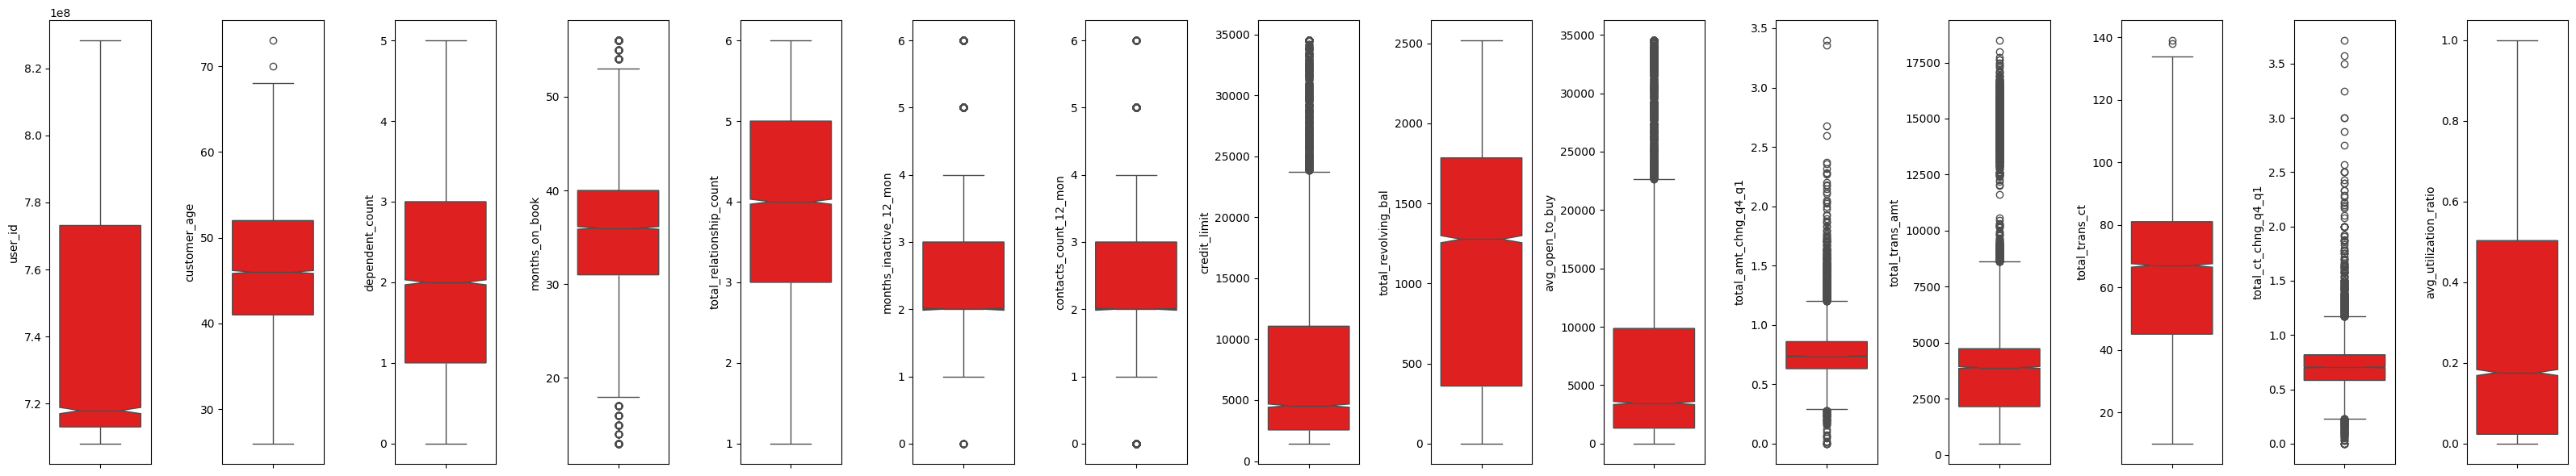

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(32,6))

# plotting
features = numerical
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=churn_data[features[i]], color='red',notch=True,vert=True)
    plt.tight_layout()

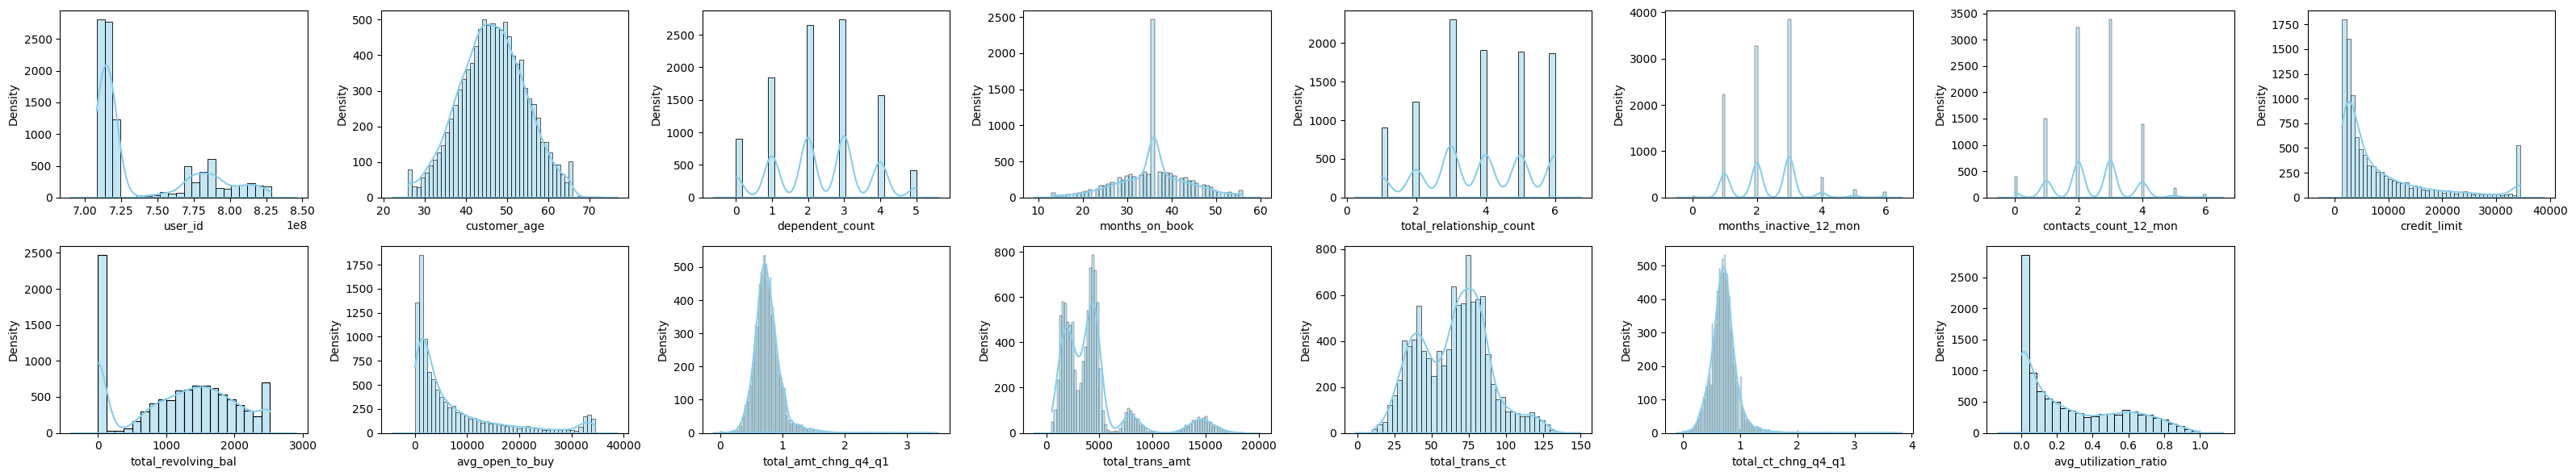

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(32,6))

features = numerical
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.kdeplot(x=churn_data[features[i]], color='skyblue')
    sns.histplot(x=churn_data[features[i]], color='skyblue', kde=True) # revised, histogram + kde
    plt.xlabel(features[i])
    plt.tight_layout()

## Bivariate Analysis

### Distrbution Age

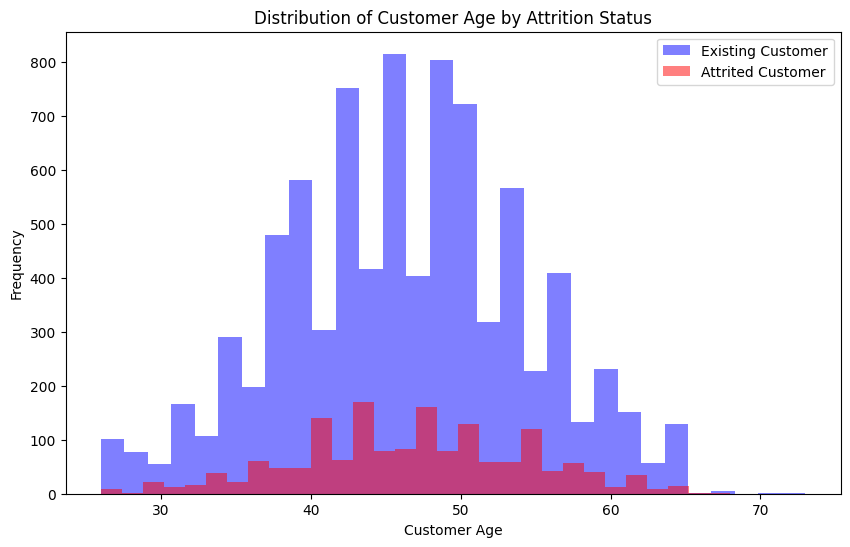

In [ ]:
# Pisahkan data menjadi dua kelompok berdasarkan attrition_flag
existing_customer_age = churn_data[churn_data['attrition_flag'] == 'Existing Customer']['customer_age']
attrited_customer_age = churn_data[churn_data['attrition_flag'] == 'Attrited Customer']['customer_age']

# Buat histogram
plt.figure(figsize=(10, 6))
plt.hist(existing_customer_age, bins=30, alpha=0.5, color='blue', label='Existing Customer')
plt.hist(attrited_customer_age, bins=30, alpha=0.5, color='red', label='Attrited Customer')

# Tambahkan label dan judul
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Age by Attrition Status')
plt.legend()

# Tampilkan grafik
plt.show()

### Heat Map Corelattion

<Axes: >

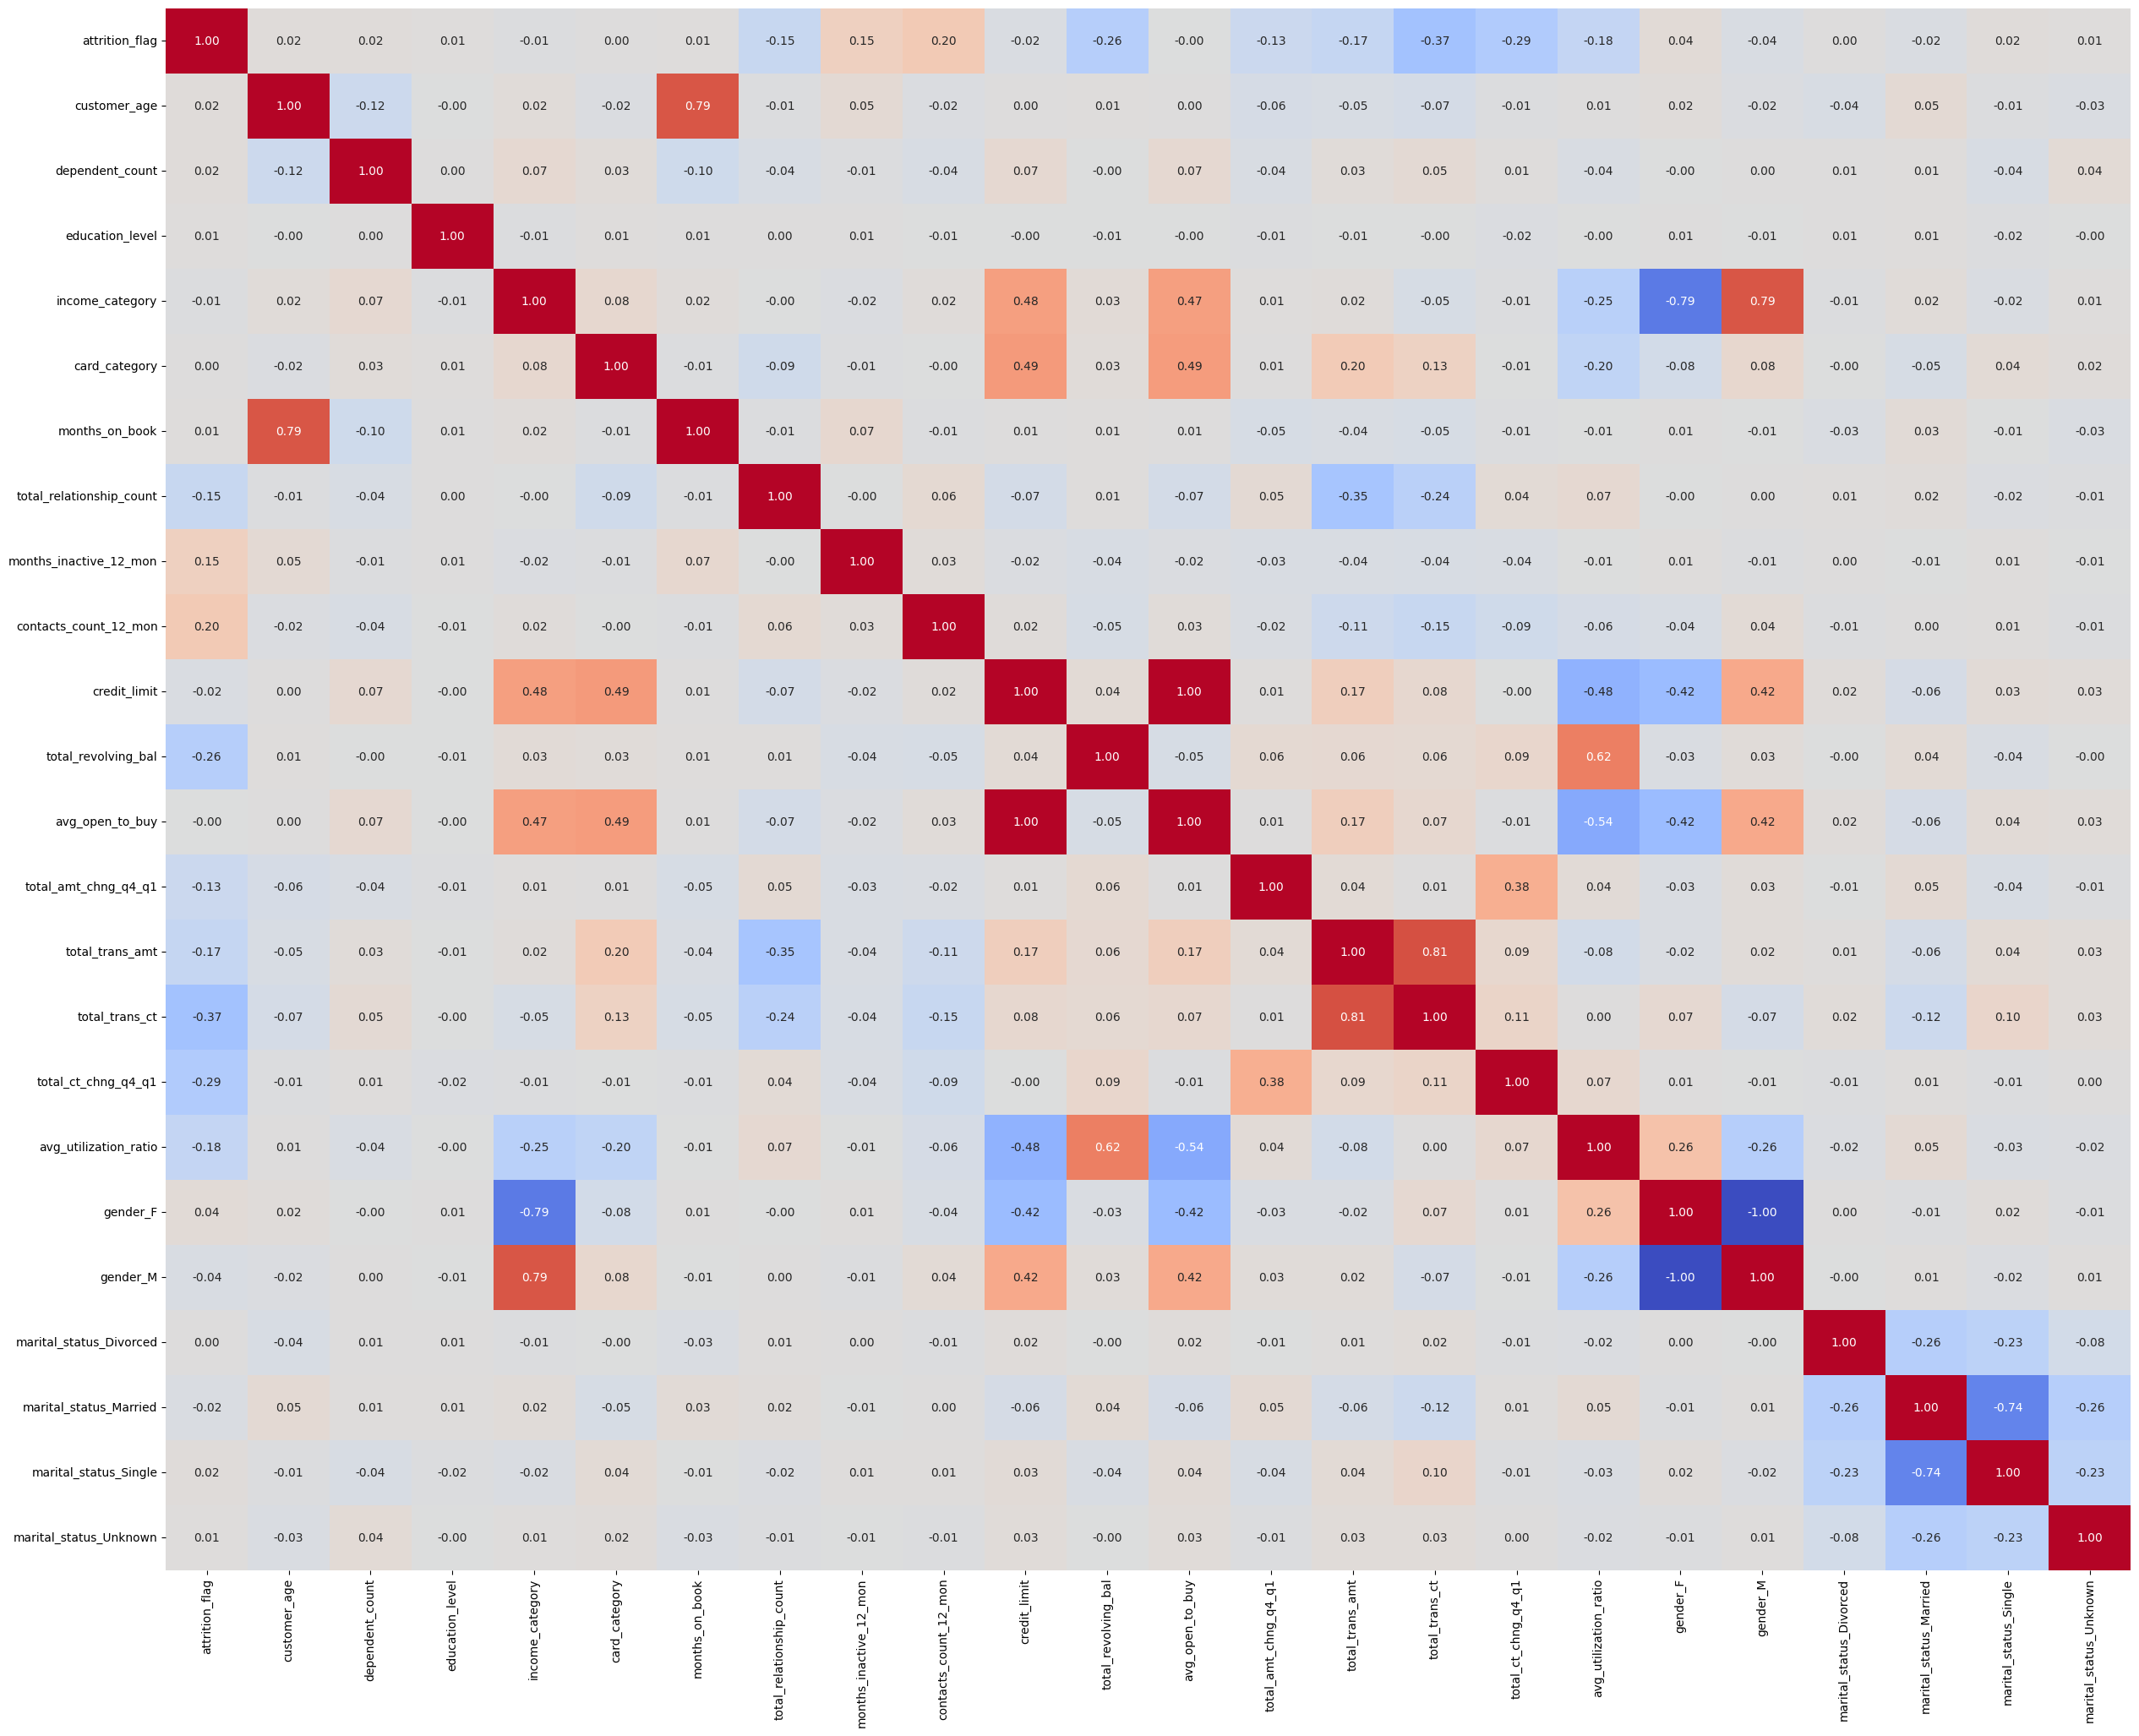

In [ ]:
# correlation heatmap
plt.figure(figsize=(30,24))
correlation = encoded_data.corr()


sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', cbar=False)

1. TIDAK ADA HUBUNGAN
2. SANGAT RENDAH

### Distribution Gender

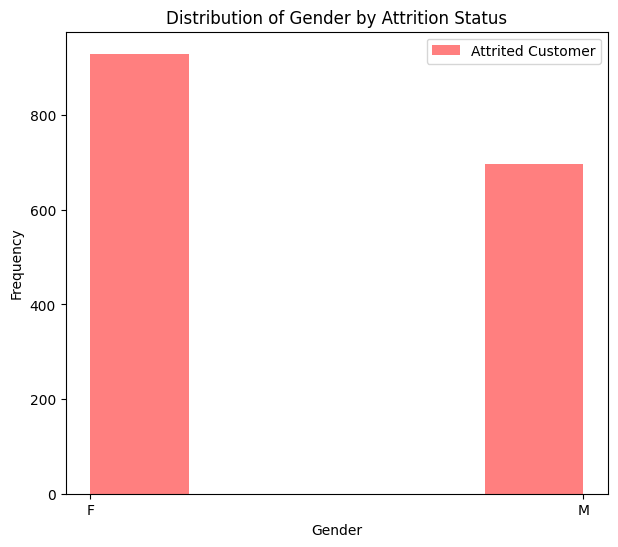

In [ ]:
# Pisahkan data menjadi dua kelompok berdasarkan attrition_flag

attrited_gender = churn_data[churn_data['attrition_flag'] == 'Attrited Customer']['gender']

# Buat histogram
plt.figure(figsize=(7, 6))
plt.hist(attrited_gender, bins=5, alpha=0.5, color='red', label='Attrited Customer')

# Tambahkan label dan judul
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Distribution of Gender by Attrition Status')
plt.legend()

# Tampilkan grafik
plt.show()

### Long User

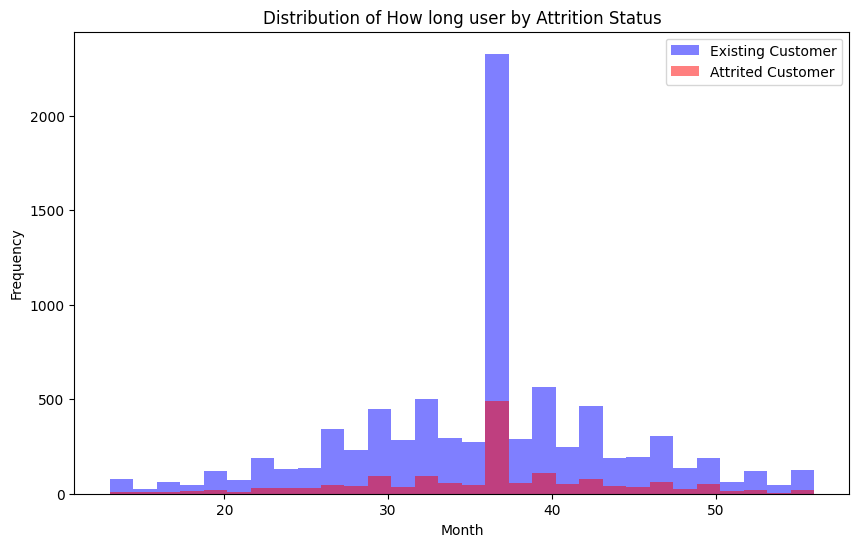

In [ ]:
# Pisahkan data menjadi dua kelompok berdasarkan attrition_flag
existing_months_on_book = churn_data[churn_data['attrition_flag'] == 'Existing Customer']['months_on_book']
attrited_months_on_book = churn_data[churn_data['attrition_flag'] == 'Attrited Customer']['months_on_book']

# Buat histogram
plt.figure(figsize=(10, 6))
plt.hist(existing_months_on_book, bins=30, alpha=0.5, color='blue', label='Existing Customer')
plt.hist(attrited_months_on_book, bins=30, alpha=0.5, color='red', label='Attrited Customer')

# Tambahkan label dan judul
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Distribution of How long user by Attrition Status')
plt.legend()

# Tampilkan grafik
plt.show()

### Count in Last year

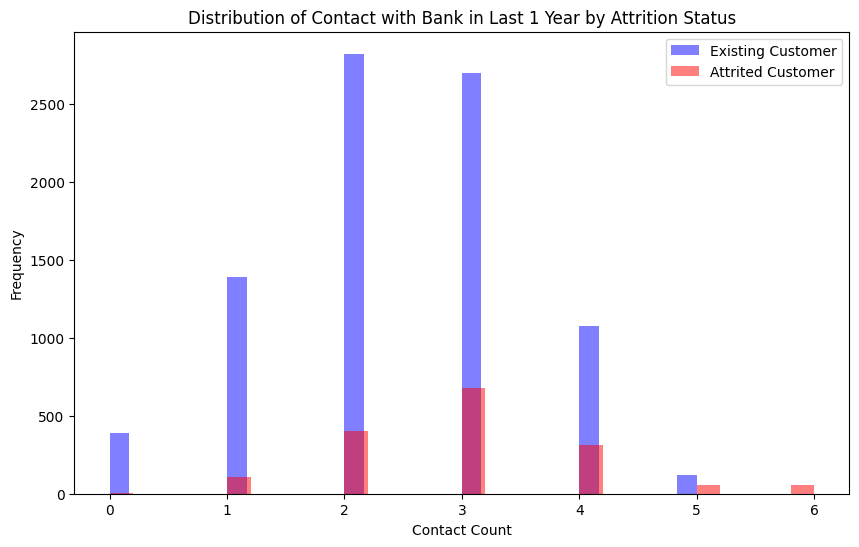

In [ ]:
# Pisahkan data menjadi dua kelompok berdasarkan attrition_flag
existing_contacts_count_12_mon = churn_data[churn_data['attrition_flag'] == 'Existing Customer']['contacts_count_12_mon']
attrited_contacts_count_12_mon = churn_data[churn_data['attrition_flag'] == 'Attrited Customer']['contacts_count_12_mon']

# Buat histogram
plt.figure(figsize=(10, 6))
plt.hist(existing_contacts_count_12_mon, bins=30, alpha=0.5, color='blue', label='Existing Customer')
plt.hist(attrited_contacts_count_12_mon, bins=30, alpha=0.5, color='red', label='Attrited Customer')

# Tambahkan label dan judul
plt.xlabel('Contact Count')
plt.ylabel('Frequency')
plt.title('Distribution of Contact with Bank in Last 1 Year by Attrition Status')
plt.legend()

# Tampilkan grafik
plt.show()

Semakin sering kontak dengan bank dalam satu tahun terakhir dapat menyebabkan Churn (cor 0.2). Saran Kemungkinan user terdapat masalah dalam mengguncakan kartu sehingga layanan customer service perlu dittingkatkan

# Outliers Analysis with IQR Method

In [ ]:
column_data = churn_data['credit_limit']

# Hitung kuartil pertama (Q1) dan kuartil ketiga (Q3)
Q1 = column_data.quantile(0.25)
Q3 = column_data.quantile(0.75)

# Hitung IQR
IQR = Q3 - Q1

# Hitung batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Temukan outlier
outliers = churn_data[(churn_data['credit_limit'] < lower_bound) | (churn_data['credit_limit'] > upper_bound)]


Asumsi tidak ada outlier dibuang, digunakan semua

In [ ]:
outliers

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
6,0,51,M,4,0,Married,5,2,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,0,32,M,0,2,Unknown,3,1,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
16,0,48,M,4,5,Single,4,0,36,6,2,3,30367.0,2362,28005.0,1.708,1671,27,0.929,0.078
40,0,45,M,3,4,Single,4,0,41,2,2,2,32426.0,578,31848.0,1.042,1109,28,0.474,0.018
45,0,49,M,4,1,Single,4,0,30,3,2,3,34516.0,0,34516.0,1.621,1444,28,1.333,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10098,1,55,M,3,4,Single,5,1,36,4,3,4,34516.0,0,34516.0,1.007,9931,70,0.750,0.000
10100,0,39,M,2,4,Unknown,3,1,36,4,2,2,29808.0,0,29808.0,0.669,16098,128,0.684,0.000
10104,0,51,M,3,4,Single,3,1,36,3,2,2,29663.0,1743,27920.0,0.667,14638,93,0.722,0.059
10110,0,56,M,1,4,Single,4,1,49,5,2,2,34516.0,1091,33425.0,0.640,15274,108,0.714,0.032


No Outlier Treatment

# Cleaning and Transforming Data

In [90]:
churn_data.drop(['user_id'],axis = 1,inplace = True)

## Label Encoding

In [91]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, ordered_categories):
        self.ordered_categories = ordered_categories

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        transformed_X = X.copy()
        for column_name, ordered_values in self.ordered_categories.items():
            transformed_X[column_name] = transformed_X[column_name].apply(lambda x: ordered_values.index(x))
        return transformed_X


desired_order = {
    'attrition_flag':  ['Existing Customer','Attrited Customer'],
    'income_category': ['Unknown','Less than $40K','$40K - $60K','$60K - $80K', '$80K - $120K', '$120K +'],
    'education_level': ['Unknown','Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate'],
    'card_category': ['Blue','Silver', 'Gold','Platinum']
}

# Menerapkan CustomLabelEncoder
encoder = CustomLabelEncoder(ordered_categories=desired_order)
churn_data = encoder.fit_transform(churn_data)

# Tampilkan hasil mapping
print("Mapping antara nilai-nilai kategori dan angka-angka untuk setiap kolom:")
for column_name, ordered_values in desired_order.items():
    print(f"Kolom: {column_name}")
    for category, encoded_value in zip(ordered_values, range(len(ordered_values))):
        print(f"{category} -> {encoded_value}")



Mapping antara nilai-nilai kategori dan angka-angka untuk setiap kolom:
Kolom: attrition_flag
Existing Customer -> 0
Attrited Customer -> 1
Kolom: income_category
Unknown -> 0
Less than $40K -> 1
$40K - $60K -> 2
$60K - $80K -> 3
$80K - $120K -> 4
$120K + -> 5
Kolom: education_level
Unknown -> 0
Uneducated -> 1
High School -> 2
College -> 3
Graduate -> 4
Post-Graduate -> 5
Doctorate -> 6
Kolom: card_category
Blue -> 0
Silver -> 1
Gold -> 2
Platinum -> 3


In [7]:
churn_data.head()

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,0,45,M,3,2,Married,3,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,4,Single,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,4,Married,4,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,2,Unknown,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,1,Married,3,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## On Hot Encoding

In [92]:
encoded_data = pd.get_dummies(churn_data, columns=['gender','marital_status'])

encoded_data.head()

,attrition_flag,customer_age,dependent_count,education_level,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,...,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,gender_F,gender_M,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown
0,0,45,3,2,3,0,39,5,1,3,...,1144,42,1.625,0.061,False,True,False,True,False,False
1,0,49,5,4,1,0,44,6,1,2,...,1291,33,3.714,0.105,True,False,False,False,True,False
2,0,51,3,4,4,0,36,4,1,0,...,1887,20,2.333,0.000,False,True,False,True,False,False
3,0,40,4,2,1,0,34,3,4,1,...,1171,20,2.333,0.760,True,False,False,False,False,True
4,0,40,3,1,3,0,21,5,1,0,...,816,28,2.500,0.000,False,True,False,True,False,False


## Split Data

In [93]:
from sklearn.model_selection import train_test_split
# Split the data into features (X) and target variable (y)
X = encoded_data.drop(columns=['attrition_flag'])
y = encoded_data['attrition_flag']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Feature Scaling

In [94]:
from sklearn.preprocessing import StandardScaler
columns_to_scale = X_train.columns.tolist()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [95]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=columns_to_scale)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=columns_to_scale)

In [122]:
X_train_scaled_df

,customer_age,dependent_count,education_level,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,...,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,gender_F,gender_M,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown
0,0.335193,-0.254374,1.416332,0.616228,-0.247566,0.255868,-0.514072,-0.337527,-2.228355,-0.059174,...,-0.903179,-1.654908,-1.126815,-0.110932,-1.056922,1.056922,-0.286308,1.071999,-0.797619,-0.274601
1,1.824522,-1.811368,-0.356814,-1.423222,-0.247566,1.869934,0.127997,-0.337527,-0.409541,-0.014979,...,-0.161443,0.075285,-0.937465,-0.996749,0.946143,-0.946143,-0.286308,-0.932837,1.253732,-0.274601
2,-2.395242,-1.811368,0.234235,1.296045,2.783090,-2.103152,-1.798211,-1.322454,0.499866,2.869310,...,2.975581,1.974276,0.160761,-0.876453,-1.056922,1.056922,-0.286308,-0.932837,-0.797619,3.641644
3,0.707525,-1.032871,-1.538911,-0.743406,-0.247566,0.007550,-1.798211,-1.322454,0.499866,-0.617091,...,0.046881,-0.177914,1.351559,2.021589,0.946143,-0.946143,-0.286308,1.071999,-0.797619,-0.274601
4,-0.285360,0.524124,-0.356814,-0.743406,-0.247566,0.007550,-1.156142,0.647401,0.499866,-0.707031,...,-0.557228,-0.853111,-0.440949,-0.996749,0.946143,-0.946143,-0.286308,-0.932837,1.253732,-0.274601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7083,-0.285360,-1.032871,0.825283,-0.063589,-0.247566,0.255868,-0.514072,-0.337527,2.318680,-0.495029,...,-0.678630,-0.895311,0.510006,1.219615,0.946143,-0.946143,-0.286308,-0.932837,1.253732,-0.274601
7084,0.831636,0.524124,-0.356814,-1.423222,-0.247566,0.007550,0.127997,0.647401,3.228087,-0.074459,...,-0.630823,-0.979711,-1.682240,-0.996749,0.946143,-0.946143,3.492743,-0.932837,-0.797619,-0.274601
7085,-0.533581,1.302621,0.825283,-0.743406,-0.247566,-0.489086,-0.514072,-1.322454,-0.409541,-0.697505,...,0.067163,0.370683,1.212702,1.441981,0.946143,-0.946143,-0.286308,-0.932837,-0.797619,3.641644
7086,-0.781803,0.524124,-1.538911,-0.063589,-0.247566,-0.985722,0.127997,-1.322454,-1.318948,-0.559161,...,-0.858849,-0.979711,-1.682240,0.749367,-1.056922,1.056922,-0.286308,-0.932837,1.253732,-0.274601


### Imbalance


In [96]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


#Machine Learning

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
# load scikit-plot modules
import scikitplot as skplt
# import dalex to explain complex model
import dalex as dx


## Prediction using SVM

In [98]:
from sklearn.svm import SVC


### RBF

In [101]:
# Initialize SVM classifier
# param_grid = {'C': [0.1, 1, 10], 'gamma': [ 0.01, 0.1, 1]}
# svm_rbf = SVC(kernel='rbf',probability=True)

# # Perform grid search cross-validation
# grid_rbf = GridSearchCV(svm_rbf, param_grid, cv=5, scoring='accuracy')
# grid_rbf.fit(X_train_resampled, y_train_resampled)

# # Get the best parameters and best score
# best_params = grid_rbf.best_params_
# best_score = grid_rbf.best_score_

# print("Best Parameters:", best_params)
# print("Best Score:", best_score)

# # Train the SVM model
# best_rbf = grid_rbf.best_estimator_

# Best Parameters: {'C': 10, 'gamma': 0.1}
# Best Score: 0.9755749954283648

Best Parameters: {'C': 10, 'gamma': 0.1}
Best Score: 0.9755749954283648


In [106]:
# Initialize SVM classifier
param_grid = {'C': [10], 'gamma': [0.1]}
svm_rbf = SVC(kernel='rbf',probability=True)

# Perform grid search cross-validation
grid_rbf = GridSearchCV(svm_rbf, param_grid, cv=5, scoring='accuracy')
grid_rbf.fit(X_train_resampled, y_train_resampled)

best_rbf = grid_rbf.best_estimator_



### Poly

In [18]:
# # Initialize SVM classifier
# svm_poly = SVC(kernel='poly')
# param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}

# # Perform grid search cross-validation
# grid_poly = GridSearchCV(svm_poly, param_grid, cv=5, scoring='accuracy')
# grid_poly.fit(X_train_resampled, y_train_resampled)

# # Get the best parameters and best score
# best_params = grid_poly.best_params_
# best_score = grid_poly.best_score_

# print("Best Parameters:", best_params)
# print("Best Score:", best_score)

# # Train the SVM model
# best_poly = grid_poly.best_estimator_

# Best Parameters: {'C': 10, 'gamma': 0.1}
# Best Score: 0.9444354479832482

Best Parameters: {'C': 10, 'gamma': 0.1}
Best Score: 0.9444354479832482


In [112]:
# Initialize SVM classifier
param_grid = {'C': [10], 'gamma': [0.1]}
svm_poly = SVC(kernel='poly',probability=True)

# Perform grid search cross-validation
grid_poly = GridSearchCV(svm_poly, param_grid, cv=5, scoring='accuracy')
grid_poly.fit(X_train_resampled, y_train_resampled)

best_poly = grid_poly.best_estimator_

### Linear

In [32]:
# # Initialize SVM classifier
# svm_line = SVC(kernel='linear')
# param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}

# # Perform grid search cross-validation
# grid_line = GridSearchCV(svm_line, param_grid, cv=5, scoring='accuracy')
# grid_line.fit(X_train_resampled, y_train_resampled)

# # Get the best parameters and best score
# best_params = grid_line.best_params_
# best_score = grid_line.best_score_

# print("Best Parameters:", best_params)
# print("Best Score:", best_score)

# # Train the SVM model
# best_line = grid_line.best_estimator_

# Best Parameters: {'C': 10, 'gamma': 0.001}
# Best Score: 0.8608356913809792


Best Parameters: {'C': 10, 'gamma': 0.001}
Best Score: 0.8608356913809792


In [111]:
# Initialize SVM classifier
param_grid = {'C': [10], 'gamma': [0.001]}
svm_line = SVC(kernel='linear',probability=True)

# Perform grid search cross-validation
grid_line = GridSearchCV(svm_line, param_grid, cv=5, scoring='accuracy')
grid_line.fit(X_train_resampled, y_train_resampled)

best_line = grid_line.best_estimator_

## Prediction using Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]}
# rf_model = RandomForestClassifier(random_state=42)
# # Perform grid search cross-validation
# grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
# grid_search_rf.fit(X_train_resampled, y_train_resampled)

# # Get the best parameters and best score
# best_params_rf = grid_search_rf.best_params_
# best_score_rf = grid_search_rf.best_score_

# print("Best Parameters:", best_params_rf)
# print("Best Score:", best_score_rf)

# # Train the Random Forest model with the best parameters
# best_rf_model = grid_search_rf.best_estimator_

# Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
# Best Score: 0.9764989413889948

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9764989413889948


In [123]:
param_grid = {
    'n_estimators': [200],
    'max_depth': [20],
    'min_samples_split': [2],
    'min_samples_leaf': [1]}
rf_model = RandomForestClassifier(random_state=42)
# Perform grid search cross-validation
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_resampled, y_train_resampled)
# Train the Random Forest model with the best parameters
best_rf_model = grid_search_rf.best_estimator_

## Prediction using XGBoost

In [128]:
import xgboost as xgb
from xgboost import XGBClassifier

In [129]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

# Model Evaluation

## Evaluation Score

In [140]:
# Make predictions on the testing set
rbf_pred = best_rbf.predict(X_test_scaled)

# Evaluate the performance of the model
print("SVM RBF:")
accuracy = accuracy_score(y_test, rbf_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, rbf_pred))

SVM RBF:
Accuracy: 0.9088515959197104

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2543
           1       0.76      0.64      0.70       496

    accuracy                           0.91      3039
   macro avg       0.85      0.80      0.82      3039
weighted avg       0.90      0.91      0.91      3039



In [141]:
# Make predictions on the testing set
poly_pred = best_poly.predict(X_test_scaled)

# Evaluate the performance of the model
print("SVM Poly:")
accuracy = accuracy_score(y_test, poly_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, poly_pred))

SVM Poly:
Accuracy: 0.8821980914774596

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2543
           1       0.61      0.75      0.67       496

    accuracy                           0.88      3039
   macro avg       0.78      0.83      0.80      3039
weighted avg       0.89      0.88      0.89      3039



In [138]:
# Make predictions on the testing set
line_pred = best_line.predict(X_test_scaled)

# Evaluate the performance of the model
print("SVM Linear:")
accuracy = accuracy_score(y_test, line_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, line_pred))

SVM Linear:
Accuracy: 0.8476472523856532

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.90      2543
           1       0.52      0.85      0.64       496

    accuracy                           0.85      3039
   macro avg       0.74      0.85      0.77      3039
weighted avg       0.89      0.85      0.86      3039



In [ ]:
rf_pred = best_rf_model.predict(X_test_scaled)

# Evaluasi kinerja model Random Forest
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report:")
print(classification_report(y_test, rf_pred))

Random Forest:
Accuracy: 0.9572227706482396
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2543
           1       0.88      0.86      0.87       496

    accuracy                           0.96      3039
   macro avg       0.92      0.92      0.92      3039
weighted avg       0.96      0.96      0.96      3039



In [ ]:
xgb_pred = xgb_model.predict(X_test_scaled)

# Evaluasi kinerja model XGBoost
print("\nXGBoost:")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Classification Report:")
print(classification_report(y_test, xgb_pred))


XGBoost:
Accuracy: 0.9651201052977953
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2543
           1       0.88      0.91      0.89       496

    accuracy                           0.97      3039
   macro avg       0.93      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039



## Confused Matrx

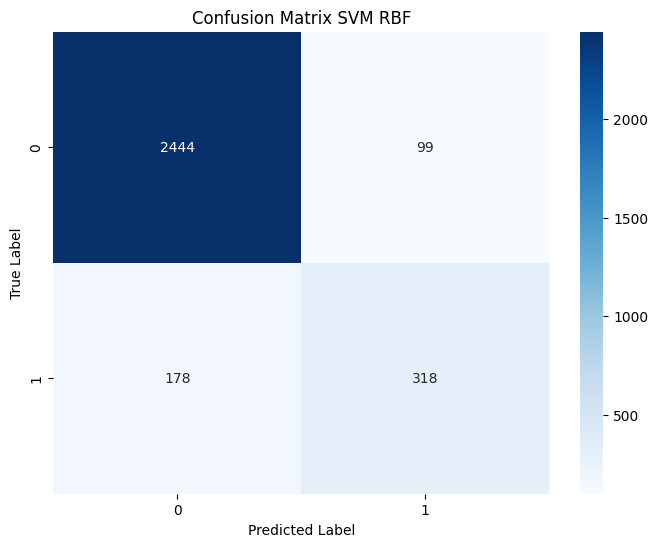

In [142]:

# Matriks konfusi
conf_matrix = confusion_matrix(y_test, rbf_pred)

# Visualisasi matriks konfusi
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix SVM RBF')
plt.show()


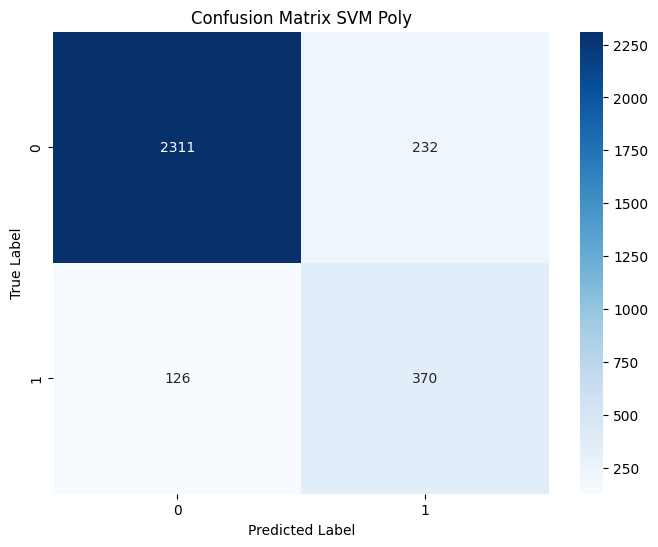

In [143]:

# Matriks konfusi
conf_matrix = confusion_matrix(y_test, poly_pred)

# Visualisasi matriks konfusi
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix SVM Poly')
plt.show()




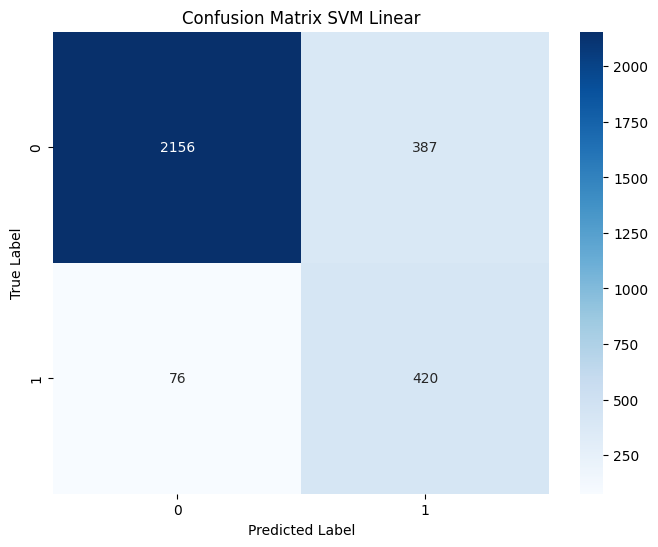

In [144]:

# Matriks konfusi
conf_matrix = confusion_matrix(y_test, line_pred)

# Visualisasi matriks konfusi
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix SVM Linear')
plt.show()



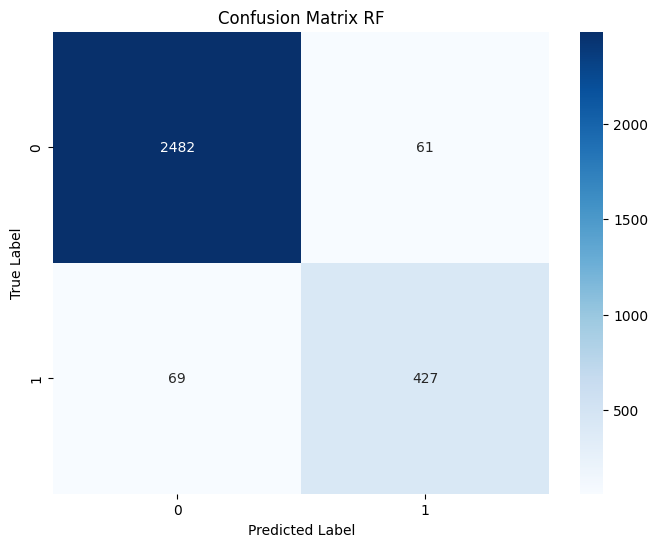

In [145]:

# Matriks konfusi
conf_matrix = confusion_matrix(y_test, rf_pred)

# Visualisasi matriks konfusi
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix RF')
plt.show()



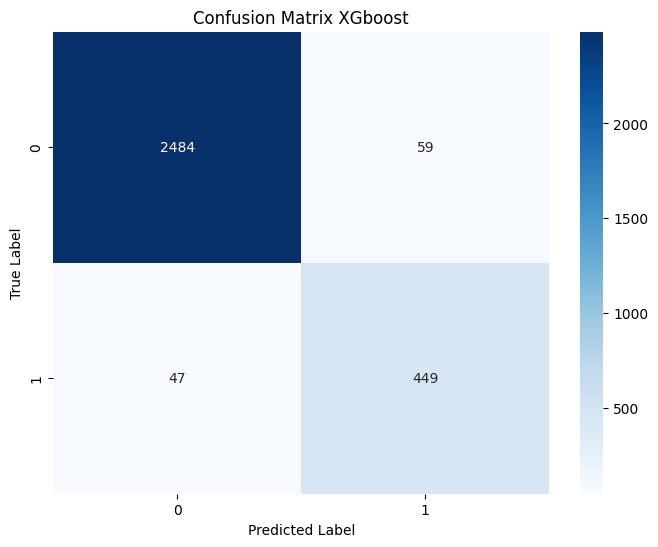

In [146]:
# Matriks konfusi
conf_matrix = confusion_matrix(y_test, xgb_pred)

# Visualisasi matriks konfusi
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix XGboost')
plt.show()




##ROC Graph

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



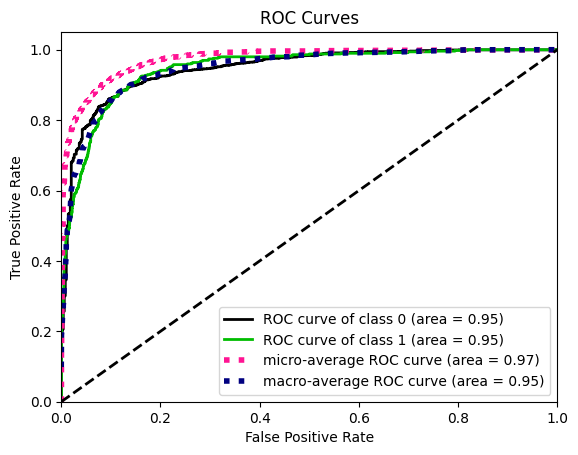

In [ ]:
# rbf result
rbf_pred_proba = best_rbf.predict_proba(X_test_scaled)
skplt.metrics.plot_roc_curve(y_test, rbf_pred_proba);

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



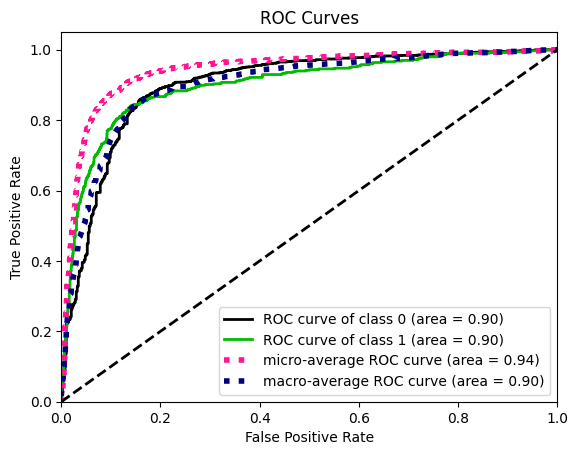

In [ ]:
# poly result
poly_pred_proba = best_poly.predict_proba(X_test_scaled)
skplt.metrics.plot_roc_curve(y_test, poly_pred_proba);

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



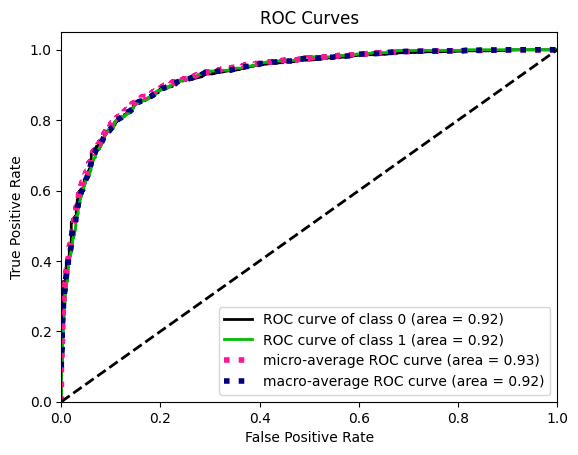

In [ ]:
# line result
line_pred_proba = best_line.predict_proba(X_test_scaled)
skplt.metrics.plot_roc_curve(y_test, line_pred_proba);

In [ ]:
# random forest result
rf_pred_proba = best_rf_model.predict_proba(X_test_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



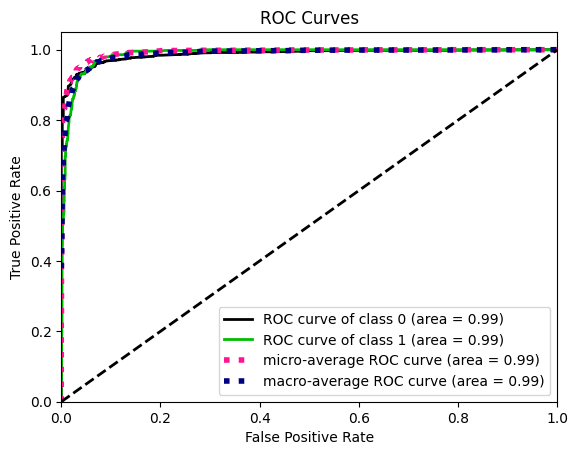

In [ ]:
skplt.metrics.plot_roc_curve(y_test, rf_pred_proba);

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



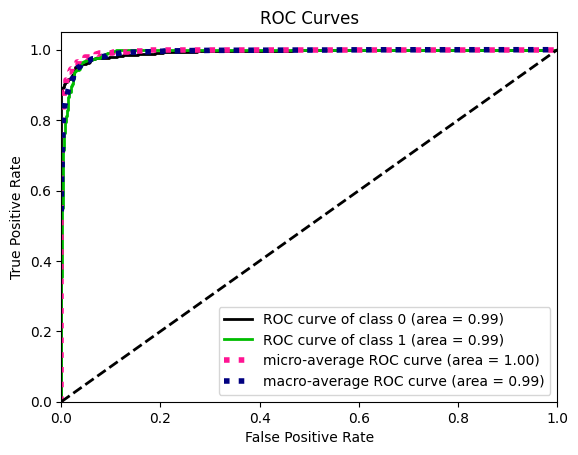

In [ ]:
# xgboost result
xgb_pred_proba = xgb_model.predict_proba(X_test_scaled)
skplt.metrics.plot_roc_curve(y_test, xgb_pred_proba);

In [ ]:
Model terbaik yang digunakan adalah xgboost dikarenakan memiliki nilai
akurasi yang tinggi serta score yang bagus, dilanjutkan dengan random forest dan svm kernel rbf.
selain itu bisa dilihat  dari kemampuan deteksinya xgboost adalah yg paling kecil errornya (FP, FN)
serta diperkuat dengan grafik roc

## Feature Importance


In [148]:
# Inititate Explainer for all models
np.random.seed(500)
## initiate explainer for SVM RBF model
churn_rbf_exp = dx.Explainer(best_rbf, X_train_scaled_df, y_train, label = "SVM RBF Interpretation")
## initiate explainer for SVM Poly model
churn_poly_exp = dx.Explainer(best_poly, X_train_scaled_df, y_train, label = "SVM Poly Interpretation")
## initiate explainer for SVM Linear model
churn_line_exp = dx.Explainer(best_line, X_train_scaled_df, y_train, label = "SVM Linear Interpretation")
## initiate explainer for Random Forest model
churn_rf_exp = dx.Explainer(best_rf_model, X_train_scaled_df, y_train, label = "RF Interpretation")
## initiate explainer for XGBoost model
churn_xgb_exp = dx.Explainer(xgb_model, X_train_scaled_df, y_train, label = "XGBoost Interpretation")

Preparation of a new explainer is initiated

  -> data              : 7088 rows 23 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 7088 values
  -> model_class       : sklearn.svm._classes.SVC (default)
  -> label             : SVM RBF Interpretation
  -> predict function  : <function yhat_proba_default at 0x7bde846eb1c0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVC was fitted without feature names



  -> predicted values  : min = 1e-07, mean = 0.158, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVC was fitted without feature names



  -> residuals         : min = -0.997, mean = 0.00163, max = 0.302
  -> model_info        : package sklearn

A new explainer has been created!
Preparation of a new explainer is initiated

  -> data              : 7088 rows 23 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 7088 values
  -> model_class       : sklearn.svm._classes.SVC (default)
  -> label             : SVM Poly Interpretation
  -> predict function  : <function yhat_proba_default at 0x7bde846eb1c0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVC was fitted without feature names



  -> predicted values  : min = 1e-07, mean = 0.201, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVC was fitted without feature names



  -> residuals         : min = -0.98, mean = -0.0418, max = 0.842
  -> model_info        : package sklearn

A new explainer has been created!
Preparation of a new explainer is initiated

  -> data              : 7088 rows 23 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 7088 values
  -> model_class       : sklearn.svm._classes.SVC (default)
  -> label             : SVM Linear Interpretation
  -> predict function  : <function yhat_proba_default at 0x7bde846eb1c0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVC was fitted without feature names



  -> predicted values  : min = 7.91e-06, mean = 0.293, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVC was fitted without feature names



  -> residuals         : min = -0.997, mean = -0.134, max = 0.993
  -> model_info        : package sklearn

A new explainer has been created!
Preparation of a new explainer is initiated

  -> data              : 7088 rows 23 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 7088 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : RF Interpretation
  -> predict function  : <function yhat_proba_default at 0x7bde846eb1c0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



  -> predicted values  : min = 0.0, mean = 0.177, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



  -> residuals         : min = -0.4, mean = -0.0175, max = 0.37
  -> model_info        : package sklearn

A new explainer has been created!
Preparation of a new explainer is initiated

  -> data              : 7088 rows 23 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 7088 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGBoost Interpretation
  -> predict function  : <function yhat_proba_default at 0x7bde846eb1c0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 2.97e-07, mean = 0.161, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.231, mean = -0.00112, max = 0.19
  -> model_info        : package xgboost

A new explainer has been created!


### Graph

In [ ]:
churn_rbf_exp.model_parts().plot()

SVM RBF

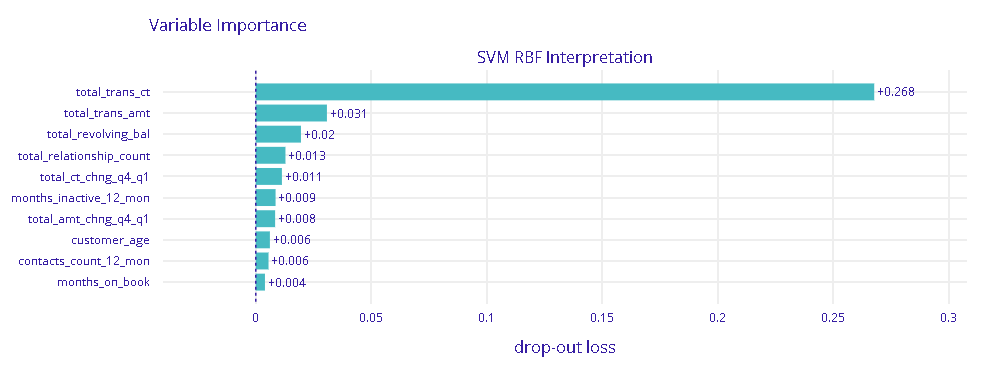

In [ ]:
churn_poly_exp.model_parts().plot()

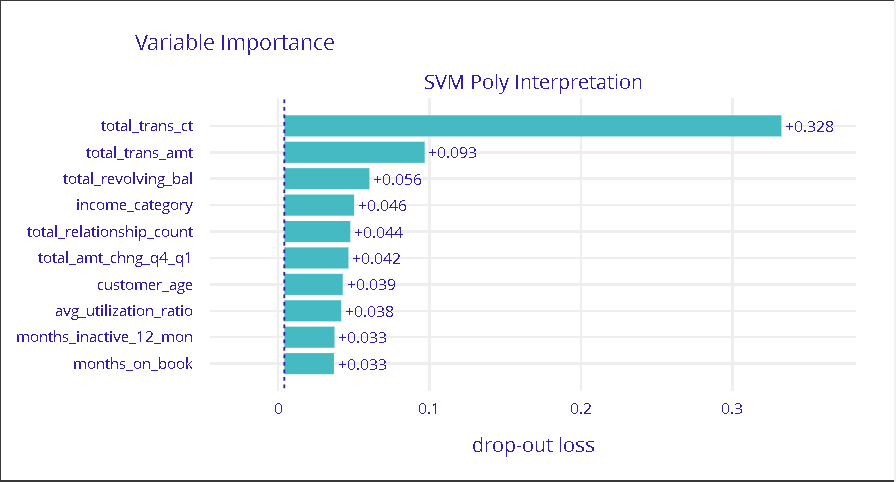

In [ ]:
churn_line_exp.model_parts().plot()

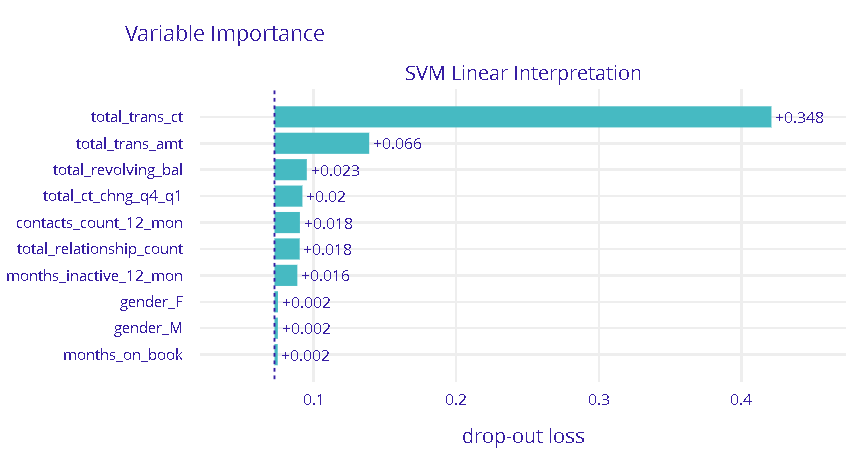

In [ ]:

# visualizr permutation feature importance for Random Forest Model
churn_rf_exp.model_parts().plot()

Random Forest

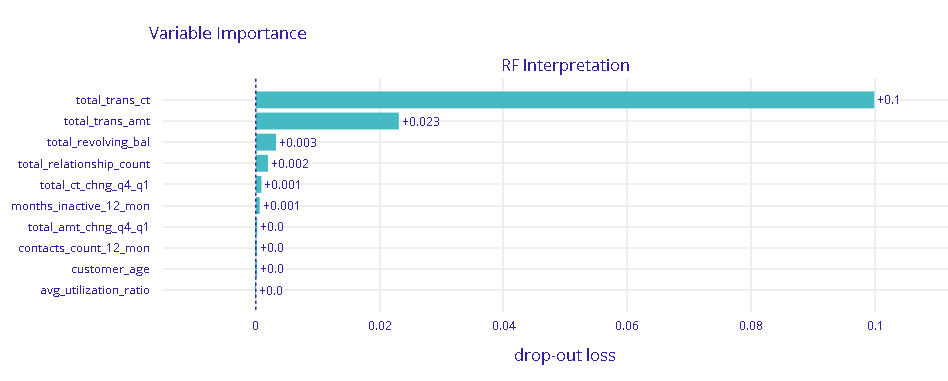

In [137]:
churn_xgb_exp.model_parts().plot()

In [ ]:
#Top 5
SVM_RBF = [total_trans_ct,total_trans_amt,total_revolving_bal,total_relationship_count,total_amt_chng_q4_q1]
SVM_RBF = [total_trans_ct,total_trans_amt,total_revolving_bal,income_category, total_relationship_count]
SVM_RBF = [total_trans_ct,total_trans_amt,total_revolving_bal,total_amt_chng_q4_q1, contacts_count_12_mon]
RF = [total_trans_ct,total_trans_amt,total_revolving_bal,total_relationship_count,total_amt_chng_q4_q1]
XGBosst= [total_trans_ct,total_trans_amt,total_relationship_count,total_amt_chng_q4_q1,total_revolving bal]


total_trans_amt: total nominal transaction in the last 12 months.
total_trans_ct: the number of transactions in the last 12 months.
total_revolving_bal: total funds used in one period.
total_relationship_count: the number of products used by customers in the bank.
total_amt_chng_q4_q1: increase in customer transaction nominal between quarter 4 and quarter 1.



## Partial Dependence Plot

### SVM

In [155]:
churn_rbf_exp.model_profile().plot()

Calculating ceteris paribus:   0%|          | 0/23 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVC was fitted without feature names

Calculating ceteris paribus:   4%|▍         | 1/23 [00:05<02:06,  5.75s/it]/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVC was fitted without feature names

Calculating ceteris paribus:   9%|▊         | 2/23 [00:10<01:53,  5.43s/it]/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVC was fitted without feature names

Calculating ceteris paribus:  13%|█▎        | 3/23 [00:17<02:03,  6.15s/it]/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVC was fitted without feature names

Calculating ceteris paribus:  17%|█▋        | 4/23 [00:23<01:49,  5.76s/it]/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has 

In [154]:
churn_poly_exp.model_profile().plot()

Calculating ceteris paribus:   0%|          | 0/23 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVC was fitted without feature names

Calculating ceteris paribus:   4%|▍         | 1/23 [00:01<00:37,  1.70s/it]/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVC was fitted without feature names

Calculating ceteris paribus:   9%|▊         | 2/23 [00:03<00:38,  1.83s/it]/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVC was fitted without feature names

Calculating ceteris paribus:  13%|█▎        | 3/23 [00:06<00:46,  2.32s/it]/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVC was fitted without feature names

Calculating ceteris paribus:  17%|█▋        | 4/23 [00:08<00:39,  2.07s/it]/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has 

In [153]:
churn_line_exp.model_profile().plot()

Calculating ceteris paribus:   0%|          | 0/23 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVC was fitted without feature names

Calculating ceteris paribus:   4%|▍         | 1/23 [00:06<02:22,  6.50s/it]/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVC was fitted without feature names

Calculating ceteris paribus:   9%|▊         | 2/23 [00:13<02:17,  6.54s/it]/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVC was fitted without feature names

Calculating ceteris paribus:  13%|█▎        | 3/23 [00:21<02:30,  7.54s/it]/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVC was fitted without feature names

Calculating ceteris paribus:  17%|█▋        | 4/23 [00:29<02:26,  7.72s/it]/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has 

### Random Forest

In [152]:
# create partial dependence plot of Random Forest model
churn_rf_exp.model_profile().plot()

Calculating ceteris paribus:   0%|          | 0/23 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

Calculating ceteris paribus:   4%|▍         | 1/23 [00:00<00:11,  1.91it/s]/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

Calculating ceteris paribus:   9%|▊         | 2/23 [00:01<00:10,  2.00it/s]/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

Calculating ceteris paribus:  13%|█▎        | 3/23 [00:01<00:09,  2.01it/s]/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

Calculating ceteris paribus:  17%|█▋        | 4/23 [00:02<00:09,  2.00it/s]/usr/

### XGBoost

In [156]:
churn_xgb_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 23/23 [00:01<00:00, 13.57it/s]


#Kesimpulan Featyre Importance

In [ ]:
#Note kesimpulan ini menggabungkan dari 3 model xgboost, rf, dan svm rbf
1. (total_trans_ct&amt)jumlah transaski dalam 1 tahun terakhir sangat mempengaruhi apakah customer berhenti berlangganan
atau tidak dibandingkan total nomninal, saran agar membuat campaign promo promo atau membuat
customer mengumpulkan poin reward yang menarik agar terus menggunakan kartu kira
2.(total_revolving_bal)Jumlah penggunaan dalam satu waktu juga harus diperhatikan juga, untuk mengetahui kebutuhan
apa yang sering menggunakan kartu sehingga kita dapat memberikan penawaran yang tepat sasaran
3. (total_relationship_count) jumlah customer menggunakan produk di bank sedikit mempangurhi pada model
tetapi dalam edatercata grafik bar customer yang sering mengunjungi lebih rentan untuk berhenti.
sehingga perlu diperhatikan lebih lagi sop yang berjalan di bank
